In [1]:
!pip install gensim

In [2]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

In [3]:
wv=api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
import nltk
import re
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
data=pd.read_csv('/content/spam.csv',encoding= 'latin')
data=data[["v1","v2"]]

In [6]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
data.shape

(5572, 2)

# **Lemmatization, Stopwords**

In [8]:
corpus=[]
for i in range(0,len(data)):
  sentence= re.sub('[^a-zA-Z]',' ',data['v2'][i])
  sentence=sentence.lower()
  sentence=sentence.split()
  sentence=[lemmatizer.lemmatize(word) for word in sentence ]
  ##sentence=[lemmatizer.lemmatize(word) for word in sentence if not word  in set(stopwords.words('english'))]  ## To avoid excluding some sentence that completely is comprised of stopwords
  sentence=' '.join(sentence)
  corpus.append(sentence)

In [9]:
[[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus,data['v2']) if i<1]

[[0, '', '645'], [0, '', ':) '], [0, '', ':-) :-)']]

In [10]:
corpus

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i don t think he go to usf he life around here though',
 'freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam ha been set a your callertune for all caller press to copy your friend callertune',
 'winner a a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hour only',
 'had your mobile month or more u r entitled to update to the latest colour mobile with camera for free call the mobile up

# **CountVectorizer**

In [11]:
cv=CountVectorizer(max_features=2500,binary=True)
X=cv.fit_transform(corpus).toarray()
X.shape

(5572, 2500)

In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **N_Grams**

In [13]:
cv.vocabulary_

{'go': 859,
 'until': 2271,
 'point': 1604,
 'crazy': 476,
 'available': 147,
 'only': 1492,
 'in': 1026,
 'bugis': 288,
 'great': 882,
 'world': 2441,
 'la': 1138,
 'cine': 393,
 'there': 2147,
 'got': 873,
 'wat': 2354,
 'ok': 1480,
 'lar': 1146,
 'joking': 1099,
 'wif': 2401,
 'oni': 1490,
 'free': 793,
 'entry': 656,
 'wkly': 2426,
 'comp': 431,
 'to': 2186,
 'win': 2406,
 'cup': 489,
 'final': 743,
 'tkts': 2181,
 'st': 2000,
 'may': 1295,
 'text': 2125,
 'receive': 1719,
 'question': 1675,
 'std': 2015,
 'txt': 2243,
 'rate': 1697,
 'apply': 101,
 'over': 1522,
 'dun': 613,
 'say': 1816,
 'so': 1946,
 'early': 620,
 'already': 65,
 'then': 2145,
 'nah': 1409,
 'don': 587,
 'think': 2151,
 'he': 930,
 'usf': 2290,
 'life': 1186,
 'around': 119,
 'here': 945,
 'though': 2160,
 'freemsg': 795,
 'hey': 946,
 'darling': 509,
 'it': 1071,
 'been': 192,
 'week': 2373,
 'now': 1459,
 'and': 79,
 'no': 1443,
 'word': 2437,
 'back': 161,
 'like': 1192,
 'some': 1953,
 'fun': 816,
 'you': 2

# **Bigrams & Trigrams**

In [14]:
cv=CountVectorizer(max_features=2500,binary=True,ngram_range=(2,3))
X=cv.fit_transform(corpus).toarray()
cv.vocabulary_

{'free entry': 542,
 'to win': 2015,
 'to to': 2008,
 'to receive': 1982,
 'std txt': 1711,
 'txt rate': 2062,
 'rate apply': 1535,
 'std txt rate': 1712,
 'txt rate apply': 2063,
 'so early': 1659,
 'don think': 471,
 'go to': 611,
 'it been': 913,
 'now and': 1316,
 'you up': 2449,
 'up for': 2078,
 'for it': 520,
 'it still': 942,
 'to send': 1988,
 'send to': 1605,
 'even my': 495,
 'is not': 888,
 'like to': 1036,
 'with me': 2305,
 'me like': 1113,
 'your request': 2491,
 'ha been': 669,
 'been set': 183,
 'set your': 1614,
 'callertune for': 284,
 'for all': 511,
 'all caller': 18,
 'caller press': 280,
 'to copy': 1929,
 'copy your': 398,
 'your friend': 2475,
 'ha been set': 671,
 'set your callertune': 1615,
 'callertune for all': 285,
 'all caller press': 19,
 'caller press to': 281,
 'copy your friend': 399,
 'customer you': 419,
 'you have': 2395,
 'have been': 690,
 'selected to': 1593,
 'to claim': 1920,
 'claim call': 341,
 'call claim': 236,
 'claim code': 342,
 'you h

In [15]:
words=[]
for sentence in corpus:
  sent_token=sent_tokenize(sentence)
  for sent in sent_token:
    words.append(word_tokenize(sent))

In [16]:
words

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  'in',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'to',
  'to',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  't',
  'c',
  's',
  'apply',
  'over',
  's'],
 ['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say'],
 ['nah',
  'i',
  'don',
  't',
  'think',
  'he',
  'go',
  'to',
  'usf',
  'he',
  'life',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'it',
  's',
  'been',
  'week',
  's',
  'now',
  'and',
  'no',
  'word',
  'back',
  'i',
  'd',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs'

# **Model Training**

In [17]:
model=Word2Vec(words,min_count=1)

In [18]:
model.wv.index_to_key

['i',
 'you',
 'to',
 'a',
 'the',
 'u',
 'and',
 'it',
 'in',
 'is',
 'me',
 'my',
 'for',
 'your',
 'call',
 'of',
 's',
 'that',
 'have',
 'on',
 'now',
 't',
 'are',
 'can',
 'm',
 'so',
 'not',
 'but',
 'or',
 'we',
 'do',
 'get',
 'at',
 'be',
 'if',
 'ur',
 'will',
 'with',
 'no',
 'just',
 'this',
 'gt',
 'lt',
 'go',
 'how',
 'up',
 'when',
 'ok',
 'day',
 'what',
 'free',
 'from',
 'out',
 'all',
 'know',
 'll',
 'got',
 'come',
 'like',
 'time',
 'good',
 'am',
 'then',
 'wa',
 'there',
 'he',
 'text',
 'only',
 'love',
 'want',
 'send',
 'p',
 'r',
 'txt',
 'one',
 'need',
 'today',
 'n',
 'going',
 'by',
 'c',
 'don',
 'home',
 'about',
 'she',
 'stop',
 'lor',
 'k',
 'sorry',
 'see',
 'mobile',
 'still',
 'take',
 'back',
 'da',
 'reply',
 'our',
 'think',
 'd',
 'dont',
 'tell',
 'week',
 'phone',
 'hi',
 'new',
 'they',
 'later',
 'pls',
 'any',
 'her',
 'please',
 'ha',
 'co',
 'did',
 'msg',
 'been',
 'min',
 'an',
 'some',
 'make',
 'dear',
 'here',
 'night',
 'messa

In [19]:
model.corpus_count

5569

In [20]:
model.epochs

5

In [21]:
model.wv.similar_by_word('india')

[('ha', 0.9984132051467896),
 ('his', 0.998259961605072),
 ('next', 0.9982059001922607),
 ('sent', 0.9981613159179688),
 ('man', 0.9981421232223511),
 ('year', 0.9980723261833191),
 ('gud', 0.9980713725090027),
 ('after', 0.9980599284172058),
 ('is', 0.9980288147926331),
 ('for', 0.9980257153511047)]

In [22]:
model.wv.most_similar('india')

[('ha', 0.9984132051467896),
 ('his', 0.998259961605072),
 ('next', 0.9982059001922607),
 ('sent', 0.9981613159179688),
 ('man', 0.9981421232223511),
 ('year', 0.9980723261833191),
 ('gud', 0.9980713725090027),
 ('after', 0.9980599284172058),
 ('is', 0.9980288147926331),
 ('for', 0.9980257153511047)]

In [23]:
model.wv['india']

array([-4.21281792e-02,  1.28795624e-01,  1.13219209e-02,  2.93345656e-02,
        5.76123931e-02, -2.08437666e-01,  1.02241613e-01,  2.97107875e-01,
       -1.12995096e-01, -1.45159706e-01, -8.54358077e-02, -2.34041274e-01,
       -6.10397942e-02,  7.73498788e-02,  4.31715064e-02, -6.82718530e-02,
        6.39066147e-03, -1.16342373e-01, -4.46731634e-02, -2.94175148e-01,
        7.38363490e-02,  4.38260660e-02,  1.00778185e-01, -6.60778880e-02,
       -2.33258139e-02, -1.83434077e-02, -1.09110437e-01, -1.26031339e-01,
       -7.29456246e-02,  4.20107916e-02,  1.48164779e-01,  3.85633521e-02,
        6.28481880e-02, -1.59946054e-01, -7.87061602e-02,  1.84278443e-01,
       -8.13644752e-03, -9.55395624e-02, -7.99001977e-02, -2.19434395e-01,
        7.85022601e-02, -9.42478627e-02,  6.30706688e-03,  2.91297287e-02,
        9.26370770e-02, -4.31280062e-02, -9.98918936e-02, -4.25966494e-02,
        8.13220441e-02,  7.78827295e-02,  8.08296055e-02, -9.50761735e-02,
       -3.99760976e-02, -

In [24]:
model.wv['india'].shape

(100,)

In [25]:
words[0]

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

# **Avg Word2Vec**

In [26]:
def avg_word2vec(doc):

  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [27]:
!pip install tqdm

In [28]:
from tqdm import tqdm

In [29]:
X=[]
for i in tqdm(range(len(words))):
  X.append(avg_word2vec(words[i]))

100%|██████████| 5569/5569 [00:02<00:00, 2071.46it/s]


In [30]:
len(X)

5569

In [31]:
X_new=np.array(X)

In [32]:
X_new

array([[-0.12900913,  0.35438174,  0.07579798, ..., -0.2520833 ,
         0.18166211,  0.11810394],
       [-0.13110007,  0.31438926,  0.10060973, ..., -0.22004133,
         0.15767078,  0.10496131],
       [-0.10356773,  0.44683227,  0.05419856, ..., -0.29790026,
         0.21701422,  0.16614476],
       ...,
       [-0.20029168,  0.47630087,  0.11925536, ..., -0.3233521 ,
         0.23812838,  0.14680056],
       [-0.21493866,  0.5258635 ,  0.13476121, ..., -0.36251557,
         0.2639562 ,  0.17209518],
       [-0.18820423,  0.46287563,  0.12563816, ..., -0.3209434 ,
         0.23141141,  0.15533377]], dtype=float32)

In [33]:
X_new.shape

(5569, 100)

In [34]:
X_new[1].shape

(100,)

In [35]:
X_new[0]

array([-1.29009128e-01,  3.54381740e-01,  7.57979751e-02,  1.12918034e-01,
        1.38345867e-01, -5.54313779e-01,  2.84899652e-01,  8.37683976e-01,
       -2.96650738e-01, -3.94293100e-01, -2.27171928e-01, -6.58503592e-01,
       -1.26691729e-01,  2.19018310e-01,  1.15928315e-01, -1.90101311e-01,
        1.31515022e-02, -3.26022476e-01, -8.87918323e-02, -8.06369305e-01,
        1.86373994e-01,  1.19207025e-01,  2.62013882e-01, -1.80481613e-01,
       -5.49970791e-02, -1.69731043e-02, -3.12610894e-01, -3.37471306e-01,
       -2.22295374e-01,  1.15987517e-01,  3.57876927e-01,  8.92345086e-02,
        1.85651109e-01, -4.33748156e-01, -1.93761259e-01,  4.79543597e-01,
       -2.16544811e-02, -2.49464795e-01, -2.38835692e-01, -5.68286359e-01,
        1.82861596e-01, -2.33330563e-01,  1.27979638e-02,  1.17629208e-01,
        2.57746845e-01, -1.10555433e-01, -2.85433024e-01, -1.30711287e-01,
        2.18690306e-01,  1.85608104e-01,  2.25027770e-01, -2.97995448e-01,
       -1.12860367e-01, -

In [36]:
messages=data['v2']

In [37]:
messages

,v2
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [38]:
messages.shape

(5572,)

In [39]:
y=messages[list(map(lambda x: len(x)>0,corpus))]
y=pd.get_dummies(y)
y=y.iloc[:,0].values.astype(int)

In [40]:
y.shape

(5569,)

In [41]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
print(np.unique(y))

[0 1]


In [61]:
X=X_new

In [62]:
X.shape

(5569, 100)

In [58]:
X[0].shape

(100,)

In [63]:
# # Use concat to append dataframes in the loop more efficiently.
df = pd.DataFrame()
for i in range(0,len(X)):
  df = pd.concat([df, pd.DataFrame(X[i].reshape(1,-1))], ignore_index=True)

In [64]:
df.shape

(5569, 100)

In [65]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.129009,0.354382,0.075798,0.112918,0.138346,-0.554314,0.284900,0.837684,-0.296651,-0.394293,...,0.510933,0.208476,0.053039,0.219921,0.634114,0.182924,0.146556,-0.252083,0.181662,0.118104
1,-0.131100,0.314389,0.100610,0.104468,0.107419,-0.498855,0.262134,0.753886,-0.271936,-0.370465,...,0.468893,0.182087,0.041879,0.206721,0.584929,0.180047,0.131737,-0.220041,0.157671,0.104961
2,-0.103568,0.446832,0.054199,0.139890,0.151048,-0.637186,0.306024,0.992662,-0.374146,-0.429210,...,0.599684,0.268280,0.078183,0.250001,0.754102,0.207015,0.195072,-0.297900,0.217014,0.166145
3,-0.209629,0.510257,0.143698,0.169531,0.175337,-0.805446,0.420553,1.236133,-0.436655,-0.594531,...,0.765909,0.298193,0.074890,0.331725,0.950761,0.286617,0.222374,-0.358243,0.252528,0.171498
4,-0.230663,0.478442,0.159103,0.189554,0.146141,-0.775263,0.412226,1.195140,-0.412888,-0.580205,...,0.756937,0.258841,0.075019,0.316567,0.914579,0.284445,0.220973,-0.330788,0.232020,0.162773


In [66]:
X=df

In [67]:
X.shape

(5569, 100)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [69]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
253,-0.197981,0.495867,0.119475,0.183133,0.175157,-0.784512,0.400330,1.188261,-0.431505,-0.563274,...,0.736040,0.286382,0.079711,0.306420,0.901023,0.264570,0.228155,-0.335098,0.249243,0.168638
1114,-0.147039,0.415448,0.080808,0.135110,0.162382,-0.651382,0.334051,0.981978,-0.348826,-0.457036,...,0.593647,0.247558,0.066289,0.260983,0.739263,0.208757,0.172150,-0.290666,0.219741,0.138873
4613,-0.068909,0.177048,0.040665,0.058543,0.061656,-0.279845,0.141422,0.418763,-0.147433,-0.193417,...,0.254951,0.102564,0.023560,0.107176,0.318885,0.090408,0.068510,-0.119419,0.090119,0.065013
4376,-0.316950,0.604960,0.207670,0.266286,0.193817,-0.990723,0.526428,1.509133,-0.539019,-0.757297,...,0.955000,0.328747,0.086011,0.394094,1.138748,0.345557,0.291913,-0.397171,0.285522,0.209264
1012,-0.152426,0.323645,0.111531,0.128331,0.111495,-0.530869,0.288748,0.809095,-0.283305,-0.403171,...,0.505554,0.178777,0.048365,0.217677,0.611981,0.186353,0.136000,-0.226897,0.163923,0.107461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,-0.236166,0.526052,0.151286,0.200144,0.186610,-0.846241,0.440480,1.277777,-0.451797,-0.625055,...,0.799517,0.298583,0.080694,0.336684,0.968610,0.290253,0.240883,-0.356274,0.257765,0.175993
3264,-0.127384,0.369120,0.070678,0.113496,0.145763,-0.570733,0.289978,0.858822,-0.300648,-0.400092,...,0.521830,0.216283,0.060593,0.224014,0.648393,0.185844,0.146234,-0.253390,0.190005,0.120032
1653,-0.180042,0.448100,0.109408,0.162304,0.157352,-0.704088,0.361427,1.057446,-0.378470,-0.504514,...,0.654647,0.255153,0.071368,0.268552,0.795952,0.235719,0.202473,-0.303297,0.219705,0.151219
2607,-0.285773,0.417250,0.199967,0.226300,0.127828,-0.733678,0.407046,1.115629,-0.398310,-0.591167,...,0.723084,0.220167,0.052681,0.294954,0.846977,0.272624,0.221734,-0.274576,0.187811,0.152380


In [70]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [72]:
y_pred=classifier.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9991023339317774

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1113
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1114
   macro avg       0.50      0.50      0.50      1114
weighted avg       1.00      1.00      1.00      1114



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


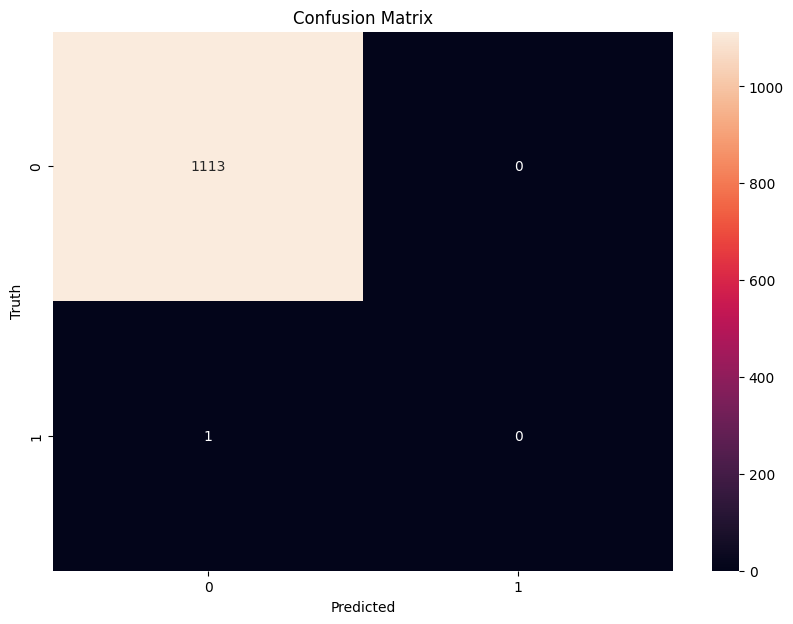

In [78]:
# prompt: plot Confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()
